## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_df, study_results_df, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data
# combined_data.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
mice_number = combined_data["Mouse ID"].unique()
len(mice_number)

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Check the to see if any mice are listed more than 10 times
combined_data['Mouse ID'].value_counts().head()

g989    13
a818    10
i901    10
z795    10
l471    10
Name: Mouse ID, dtype: int64

In [16]:
# Check Mouse ID = g989 to see where is listed twice
combined_data_mice = combined_data.set_index('Mouse ID')
mouse = combined_data_mice.loc['g989', :]
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [22]:
# Drop any duplicate rows
# Delete the data for Mouse ID = g989
clean_data_mice = combined_data_mice.drop(index = 'g989')
clean_data = clean_data_mice.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Recheck the number of mice
mice_number2 = clean_data["Mouse ID"].unique()
len(mice_number2)

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_data.groupby("Drug Regimen")

mean = summary_stats["Tumor Volume (mm3)"].mean()
median = summary_stats["Tumor Volume (mm3)"].median()
variance = summary_stats["Tumor Volume (mm3)"].var()
std_dev = summary_stats["Tumor Volume (mm3)"].std()
sem = summary_stats["Tumor Volume (mm3)"].sem()

# Create a dataframe for Summary statistics 
summary_stats_group = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": std_dev,
                              "SEM": sem})

summary_stats_group

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Drug Regimen')

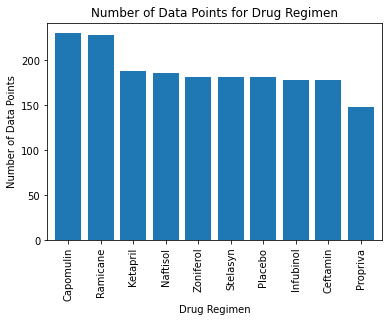

In [71]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
bar_plot_pandas = clean_data['Drug Regimen'].value_counts().plot(kind="bar", figsize=(6,4), width = 0.8)

# Set labels for axes
bar_plot_pandas.set_xlabel("Drug Regimen")
bar_plot_pandas.set_ylabel("Number of Data Points")
bar_plot_pandas.set_title("Number of Data Points for Drug Regimen")
# There should be a single bar per regimen

Text(0, 0.5, 'Number of Data Points')

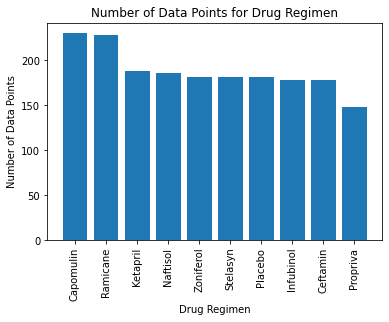

In [63]:
# Generate identical bar plot using pyplot instead of pandas.
drugs = clean_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(drugs))
plt.bar(x_axis, drugs, alpha=1, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs.index.values)

# Rotate the xticks to be vertical
plt.xticks(rotation = 90)

# Give our chart some labels and a title
plt.title("Number of Data Points for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0.5, 1.0, 'Female versus Male mice')

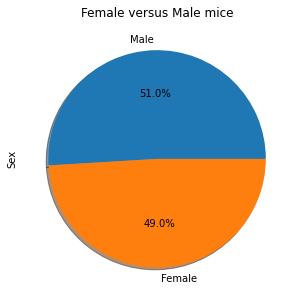

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_pandas = clean_data['Sex'].value_counts().plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', shadow=True)

# Set Title label
pie_plot_pandas.set_title("Female versus Male mice")

Text(0.5, 1.0, 'Female versus Male mice')

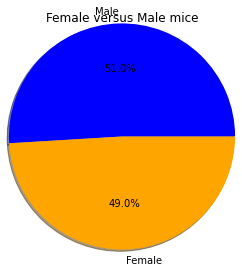

In [91]:
# Generate identical pie plot using pyplot
# Labels for the sections of our pie chart
# The values of each section of the pie chart
sex = clean_data['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.3)

# Set Title label
plt.title("Female versus Male mice")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights